# 1) Missing Values And Outliers

In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [150]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

life_expectancy_df = pd.read_sql_query('select * from lifeexpectancy',con = engine)

engine.dispose()

In [151]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [152]:
life_expectancy_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [153]:
for column_name in life_expectancy_df.columns:
    print("Unique values in column {} are: {}".format(column_name, life_expectancy_df[column_name].unique()))

Unique values in column Country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [154]:
for column_name in ["Alcohol", "Hepatitis B"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in life_expectancy_df["Alcohol"]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: Alcohol
These are the problematic values for the variable: Hepatitis B


In [155]:
def interpolate_columns(dataframe, country, list_of_columns): 
    for column in list_of_columns: 
        dataframe.loc[(dataframe["Country"] == country) & (dataframe[column].isnull()), column] = dataframe[column].interpolate()

null_list = life_expectancy_df.columns[life_expectancy_df.isnull().any()] 
country_list = life_expectancy_df["Country"].unique()

for country in country_list: 
    interpolate_columns(life_expectancy_df, country, null_list)

life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

In [156]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

In [157]:
life_expectancy_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
life_expectancy_df.isnull().sum()*100/life_expectancy_df.isnull().count()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [159]:
life_expectancy_df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [160]:
life_expectancy_df.Status = life_expectancy_df.Status.apply(str.strip).replace("", np.nan)

life_expectancy_df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [161]:
life_expectancy_df["Alcohol"].fillna(life_expectancy_df["Alcohol"].mean(), inplace=True)
life_expectancy_df["Hepatitis B"].fillna(life_expectancy_df["Hepatitis B"].mean(), inplace=True)

In [162]:
life_expectancy_df.isnull().sum()*100/life_expectancy_df.count()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [163]:
status_list = life_expectancy_df.Status

for i in range(0, len(life_expectancy_df.Status)):
    if pd.isnull(life_expectancy_df.Status[i]):
        life_expectancy_df.Status[i] = life_expectancy_df.Status[i-1]
        
life_expectancy_df["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

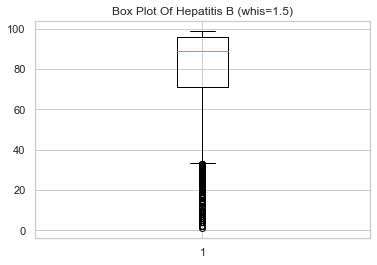

In [164]:
plt.boxplot(life_expectancy_df["Hepatitis B"])
plt.title("Box Plot Of Hepatitis B (whis=1.5)")
plt.show()

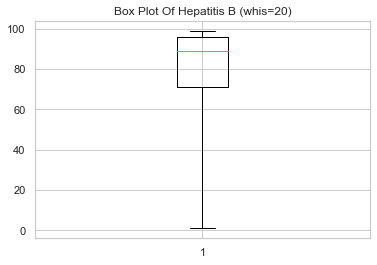

In [165]:
plt.boxplot(life_expectancy_df["Hepatitis B"], whis=20)
plt.title("Box Plot Of Hepatitis B (whis=20)")
plt.show()

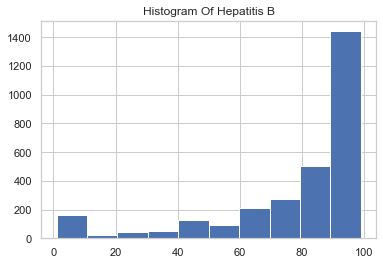

In [166]:
plt.hist(life_expectancy_df["Hepatitis B"])
plt.title("Histogram Of Hepatitis B")
plt.show()

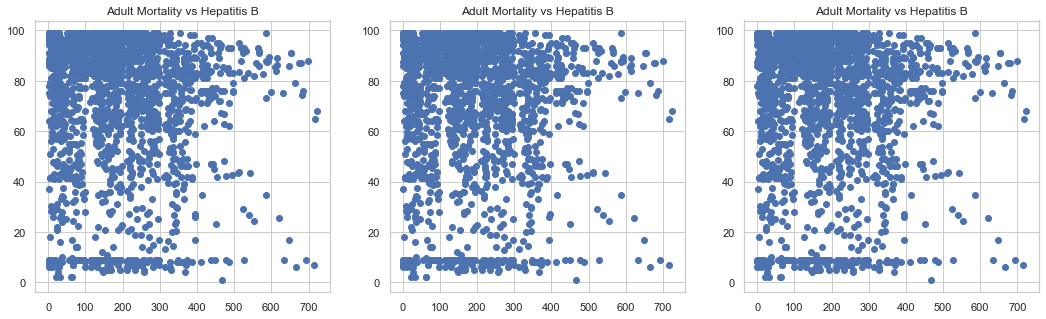

In [11]:
# Three graphs that might stay in the assignment

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(life_expectancy_df["Adult Mortality"], life_expectancy_df["Hepatitis B"])
plt.title("Adult Mortality vs Hepatitis B")

plt.subplot(1,3,2)
plt.scatter(life_expectancy_df["Adult Mortality"], life_expectancy_df["Hepatitis B"])
plt.title("Adult Mortality vs Hepatitis B")

plt.subplot(1,3,3)
plt.scatter(life_expectancy_df["Adult Mortality"], life_expectancy_df["Hepatitis B"])
plt.title("Adult Mortality vs Hepatitis B")

plt.show()

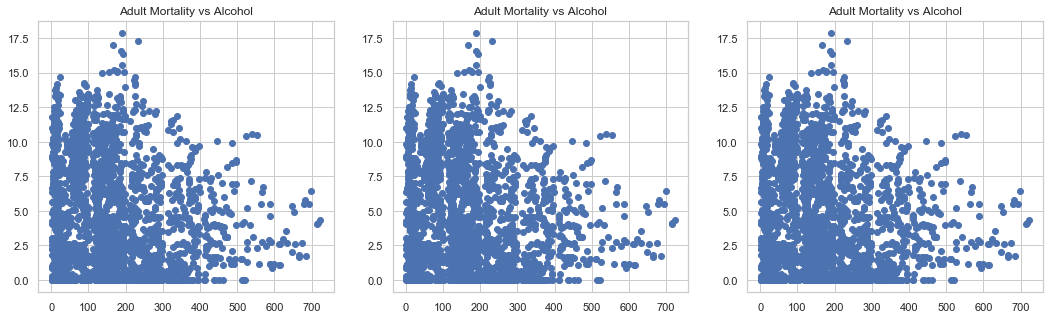

In [5]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(life_expectancy_df["Adult Mortality"], life_expectancy_df["Alcohol"])
plt.title("Adult Mortality vs Alcohol")

plt.subplot(1,3,2)
plt.scatter(life_expectancy_df["Adult Mortality"], life_expectancy_df["Alcohol"])
plt.title("Adult Mortality vs Alcohol")

plt.subplot(1,3,3)
plt.scatter(life_expectancy_df["Adult Mortality"], life_expectancy_df["Alcohol"])
plt.title("Adult Mortality vs Alcohol")

plt.show()

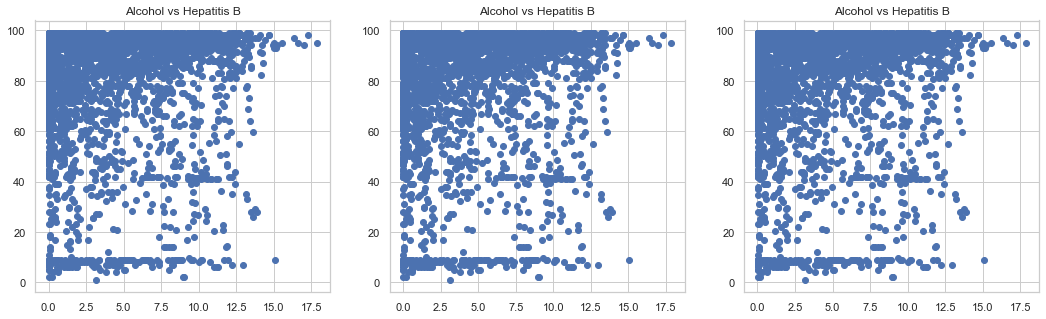

In [7]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(life_expectancy_df["Alcohol"], life_expectancy_df["Hepatitis B"])
plt.title("Alcohol vs Hepatitis B")

plt.subplot(1,3,2)
plt.scatter(life_expectancy_df["Alcohol"], life_expectancy_df["Hepatitis B"])
plt.title("Alcohol vs Hepatitis B")

plt.subplot(1,3,3)
plt.scatter(life_expectancy_df["Alcohol"], life_expectancy_df["Hepatitis B"])
plt.title("Alcohol vs Hepatitis B")

plt.show()

In [167]:
from scipy.stats import zscore

z_scores = zscore(life_expectancy_df["Hepatitis B"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


In [168]:
q75, q25 = np.percentile(life_expectancy_df["Hepatitis B"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expectancy_df["Hepatitis B"] > max_val) 
                      | (life_expectancy_df["Hepatitis B"] < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 372
The score threshold is: 1.5
Number of outliers is: 248
The score threshold is: 2.0
Number of outliers is: 190
The score threshold is: 2.5
Number of outliers is: 95
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [169]:
from scipy.stats.mstats import winsorize

winsorized_views = winsorize(life_expectancy_df["Hepatitis B"], (0, 0.10))

winsorized_views

masked_array(data=[65., 62., 64., ..., 73., 76., 79.],
             mask=False,
       fill_value=1e+20)

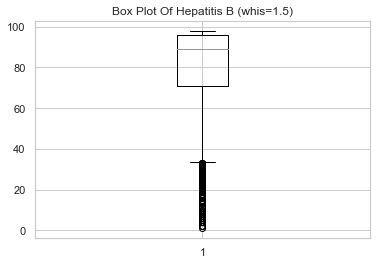

In [170]:
plt.boxplot(winsorized_views)
plt.title("Box Plot Of Hepatitis B (whis=1.5)")
plt.show()

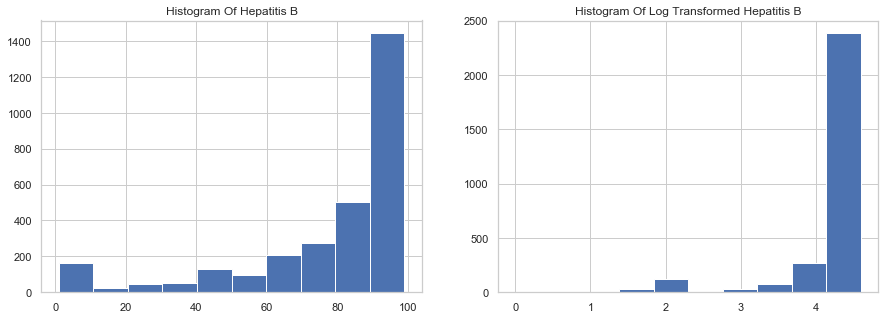

In [171]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(life_expectancy_df["Hepatitis B"])
plt.title("Histogram Of Hepatitis B")

plt.subplot(1,2,2)
plt.hist(np.log(life_expectancy_df["Hepatitis B"]))
plt.title("Histogram Of Log Transformed Hepatitis B")
plt.show()

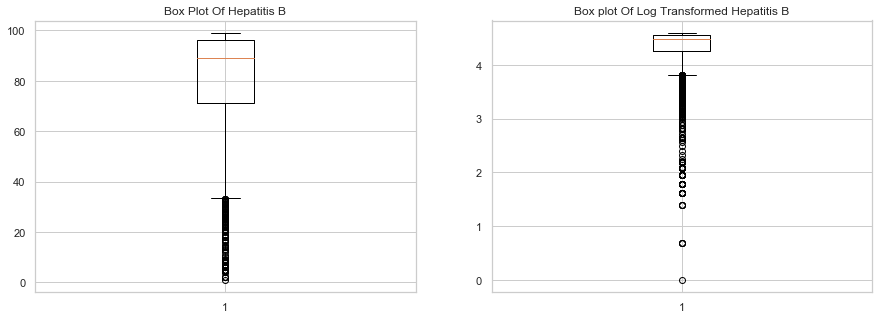

In [172]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(life_expectancy_df["Hepatitis B"])
plt.title("Box Plot Of Hepatitis B")

plt.subplot(1,2,2)
plt.boxplot(np.log(life_expectancy_df["Hepatitis B"]))
plt.title("Box plot Of Log Transformed Hepatitis B")
plt.show()

In [173]:
q75, q25 = np.percentile(np.log(life_expectancy_df["Hepatitis B"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(len((np.where((np.log(life_expectancy_df["Hepatitis B"]) > max_val) 
                      | (np.log(life_expectancy_df["Hepatitis B"]) < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 443
The score threshold is: 1.5
Number of outliers is: 366
The score threshold is: 2.0
Number of outliers is: 276
The score threshold is: 2.5
Number of outliers is: 248
The score threshold is: 3.0
Number of outliers is: 228
The score threshold is: 3.5
Number of outliers is: 206
The score threshold is: 4.0
Number of outliers is: 192
The score threshold is: 4.5
Number of outliers is: 184


# 2) Univariate And Multivariate Exploration Techniques

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

life_expectancy_df = pd.read_sql_query('select * from lifeexpectancy',con = engine)

engine.dispose()

life_expectancy_df["winsorized_alcohol"] = winsorized_views = winsorize(life_expectancy_df["Alcohol"], (0, 0.10))
life_expectancy_df["winsorized_hepatitis_b"] = winsorized_views = winsorize(life_expectancy_df["Hepatitis B"], (0, 0.10))
life_expectancy_df["winsorized_views"] = winsorized_views = winsorize(life_expectancy_df["Adult Mortality"], (0, 0.10))

for i in range(0, len(life_expectancy_df.Status)):
    if pd.isnull(life_expectancy_df.Status[i]):
        life_expectancy_df.Status[i] = life_expectancy_df.Status[i-1]

In [175]:
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,winsorized_alcohol,winsorized_hepatitis_b,winsorized_views
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,...,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000,2385.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,5.068846,80.940461,155.889381
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,...,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,4.277392,25.070016,101.983387
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.010000,1.000000,1.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,...,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,1.092500,77.000000,74.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,4.160000,92.000000,144.000000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,...,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,8.772500,97.000000,228.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,12.260000,99.000000,337.000000


In [176]:
life_expectancy_df.describe(include=['O'])

,Country,Status
count,2938,2938
unique,193,2
top,Montenegro,Developing
freq,16,2426


In [177]:
life_expectancy_df.describe(include= 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,winsorized_alcohol,winsorized_hepatitis_b,winsorized_views
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000,2385.000000,2938.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Montenegro,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,5.068846,80.940461,155.889381
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,4.277392,25.070016,101.983387
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.010000,1.000000,1.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,1.092500,77.000000,74.000000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,4.160000,92.000000,144.000000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,8.772500,97.000000,228.000000


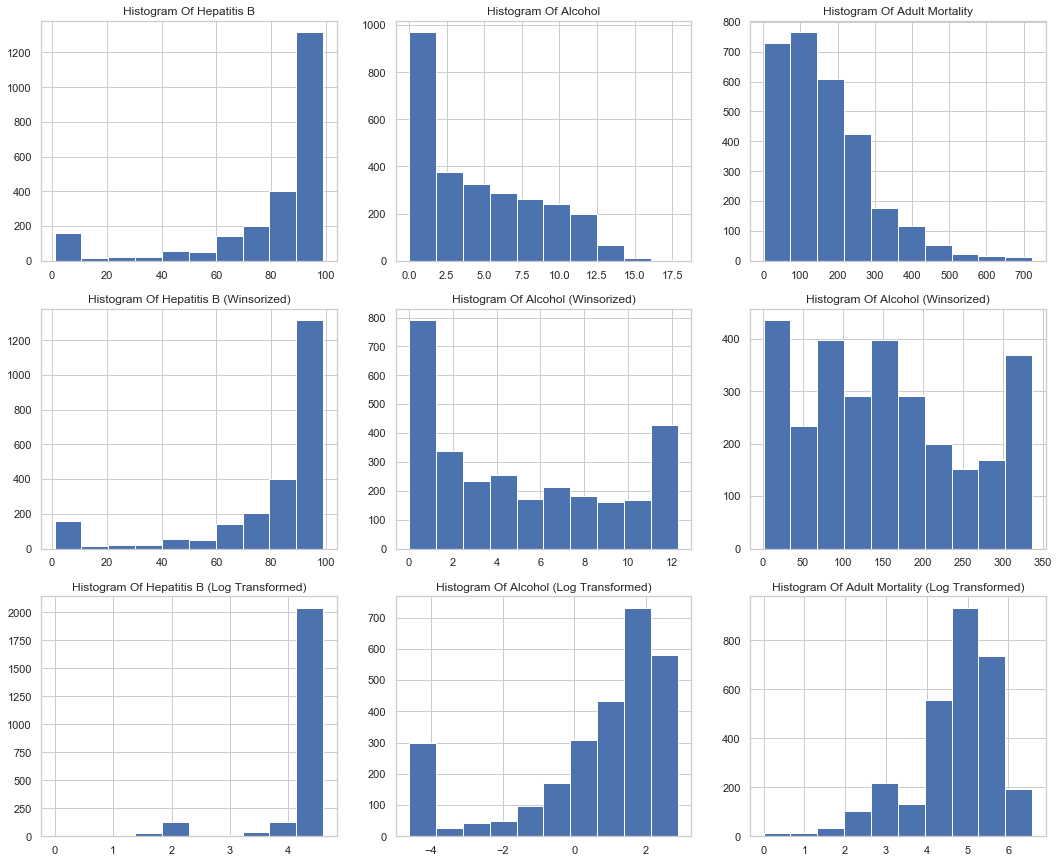

In [178]:
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(life_expectancy_df["Hepatitis B"])
plt.title("Histogram Of Hepatitis B")

plt.subplot(3, 3, 2)
plt.hist(life_expectancy_df["Alcohol"])
plt.title("Histogram Of Alcohol")

plt.subplot(3, 3, 3)
plt.hist(life_expectancy_df["Adult Mortality"])
plt.title("Histogram Of Adult Mortality")

plt.subplot(3, 3, 4)
plt.hist(life_expectancy_df["winsorized_hepatitis_b"])
plt.title("Histogram Of Hepatitis B (Winsorized)")

plt.subplot(3, 3, 5)
plt.hist(life_expectancy_df["winsorized_alcohol"])
plt.title("Histogram Of Alcohol (Winsorized)")

plt.subplot(3, 3, 6)
plt.hist(life_expectancy_df["winsorized_views"])
plt.title("Histogram Of Alcohol (Winsorized)")

plt.subplot(3, 3, 7)
plt.hist(np.log(life_expectancy_df["Hepatitis B"]))
plt.title("Histogram Of Hepatitis B (Log Transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(life_expectancy_df["Alcohol"]))
plt.title("Histogram Of Alcohol (Log Transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(life_expectancy_df["Adult Mortality"]))
plt.title("Histogram Of Adult Mortality (Log Transformed)")


plt.show()

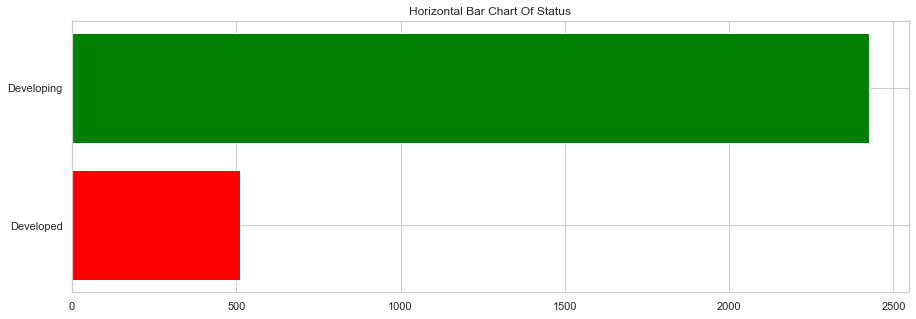

In [179]:
plt.figure(figsize=(15,5))
plt.barh(life_expectancy_df.groupby("Status")["Status"].count().index, 
        life_expectancy_df.groupby("Status")["Status"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Horizontal Bar Chart Of Status")

plt.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_expectancy_df = pd.read_sql_query('select * from lifeexpectancy', con = engine)

engine.dispose()

def interpolate_columns(dataframe, country, list_of_columns): 
    for column in list_of_columns: 
        dataframe.loc[(dataframe["Country"] == country) & (dataframe[column].isnull()), column] = dataframe[column].interpolate()

null_list = life_expectancy_df.columns[life_expectancy_df.isnull().any()] 
country_list = life_expectancy_df["Country"].unique()

for country in country_list: 
    interpolate_columns(life_expectancy_df, country, null_list)

life_expectancy_df.info()

life_expectancy_df["winsorized_alcohol"] = winsorize(life_expectancy_df["Alcohol"], (0, 0.10))
life_expectancy_df["winsorized_hepatitis_b"] = winsorize(life_expectancy_df["Hepatitis B"], (0, 0.10))
life_expectancy_df["winsorized_views"] = winsorize(life_expectancy_df["Adult Mortality"], (0, 0.10))

for i in range(0, len(life_expectancy_df.Status)):
    if pd.isnull(life_expectancy_df.Status[i]):
        life_expectancy_df.Status[i] = life_expectancy_df.Status[i-1]
        
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(life_expectancy_df["Adult Mortality"], life_expectancy_df["Alcohol"])
plt.title("Adult Mortality vs Alcohol")

plt.subplot(1,3,2)
plt.scatter(life_expectancy_df["Adult Mortality"], life_expectancy_df["Hepatitis B"])
plt.title("Adult Mortality vs Hepatitis B")

plt.subplot(1,3,3)
plt.scatter(life_expectancy_df["Hepatitis B"], life_expectancy_df["Hepatitis B"])
plt.title("Adult Mortality vs Hepatitis B")

plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

<Figure size 1800x500 with 3 Axes>

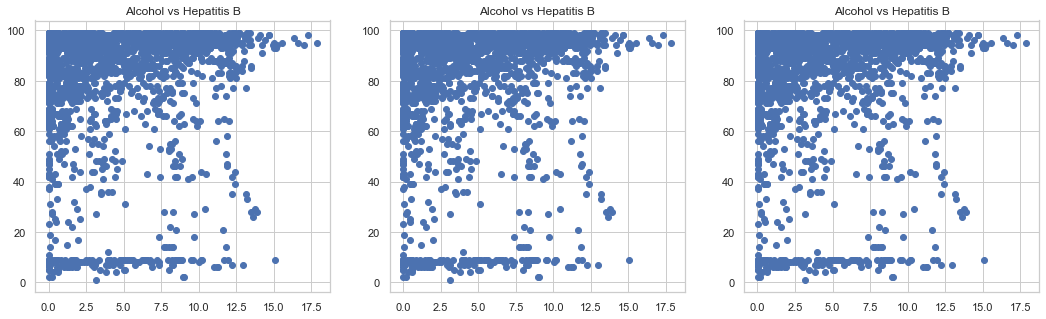

In [181]:
postgres_db = 'lifeexpectancy'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

life_expectancy_df = pd.read_sql_query('select * from lifeexpectancy',con = engine2)

engine2.dispose()

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(life_expectancy_df["Alcohol"], life_expectancy_df["Hepatitis B"])
plt.title("Alcohol vs Hepatitis B")

plt.subplot(1,3,2)
plt.scatter(life_expectancy_df["Alcohol"], life_expectancy_df["Hepatitis B"])
plt.title("Alcohol vs Hepatitis B")

plt.subplot(1,3,3)
plt.scatter(life_expectancy_df["Alcohol"], life_expectancy_df["Hepatitis B"])
plt.title("Alcohol vs Hepatitis B")

plt.show()

In [182]:
life_expectancy_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [183]:
life_expectancy_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


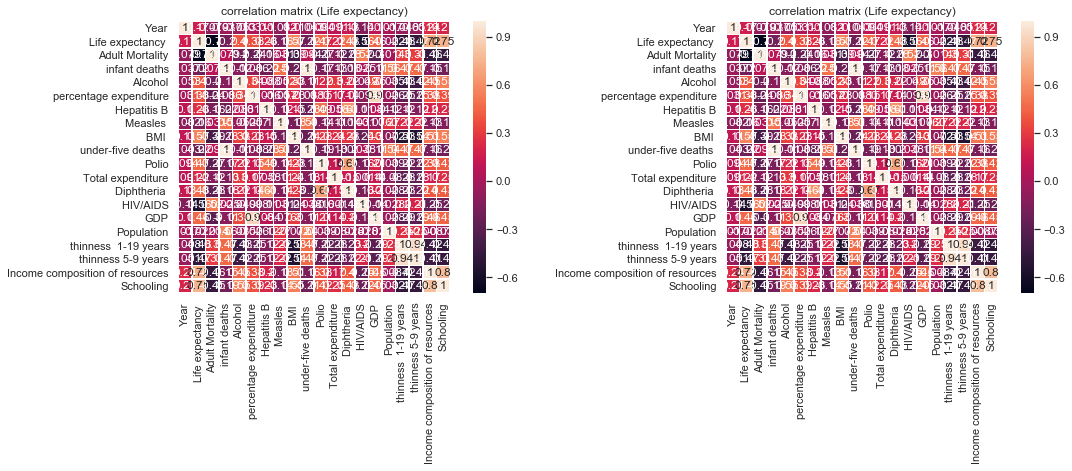

In [184]:
corrmat_life_expectancy = life_expectancy_df.corr()

corrmat_life_expectancy = life_expectancy_df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)

sns.heatmap(corrmat_life_expectancy, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Life expectancy)")

plt.subplot(1,2,2)

sns.heatmap(corrmat_life_expectancy, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Life expectancy)")

plt.show()

In [185]:
life_expectancy_df.groupby("Status").mean()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,93.736328,7.554042,93.476562,0.100000,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474
Developing,2007.522671,67.111465,182.833195,36.384171,3.484119,323.470285,79.763930,2824.926216,35.435326,50.525144,80.170752,5.590694,79.951807,2.088664,4286.556053,1.407108e+07,5.592935,5.635242,0.582310,11.219256


In [186]:
life_expectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 3) Feature Engineering

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

life_expectancy_df = pd.read_sql_query('select * from lifeexpectancy',con = engine)

engine.dispose()

def interpolate_columns(dataframe, country, list_of_columns): 
    for column in list_of_columns: 
        dataframe.loc[(dataframe["Country"] == country) & (dataframe[column].isnull()), column] = dataframe[column].interpolate()

null_list = life_expectancy_df.columns[life_expectancy_df.isnull().any()] 
country_list = life_expectancy_df["Country"].unique()

for country in country_list: 
    interpolate_columns(life_expectancy_df, country, null_list)

life_expectancy_df.info()

life_expectancy_df["winsorized_alcohol"] = winsorized_views = winsorize(life_expectancy_df["Alcohol"], (0, 0.10))
life_expectancy_df["winsorized_hepatitis_b"] = winsorized_views = winsorize(life_expectancy_df["Hepatitis B"], (0, 0.10))
life_expectancy_df["winsorized_views"] = winsorized_views = winsorize(life_expectancy_df["Adult Mortality"], (0, 0.10))

for i in range(0, len(life_expectancy_df.Status)):
    if pd.isnull(life_expectancy_df.Status[i]):
        life_expectancy_df.Status[i] = life_expectancy_df.Status[i-1]
        
pd.get_dummies(life_expectancy_df["Status"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [188]:
life_expectancy_df = pd.concat([life_expectancy_df, pd.get_dummies(life_expectancy_df["Status"])], axis=1)
life_expectancy_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,winsorized_alcohol,winsorized_hepatitis_b,winsorized_views,Developed,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.000000,1154,...,33736494.0,17.2,17.3,0.479,10.1,0.01,65.000000,263.0,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.000000,492,...,327582.0,17.5,17.5,0.476,10.0,0.01,62.000000,271.0,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.000000,430,...,31731688.0,17.7,17.7,0.470,9.9,0.01,64.000000,268.0,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.000000,2787,...,3696958.0,17.9,18.0,0.463,9.8,0.01,67.000000,272.0,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.000000,3013,...,2978599.0,18.2,18.2,0.454,9.5,0.01,68.000000,275.0,0,1
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.000000,1989,...,2883167.0,18.4,18.4,0.448,9.2,0.01,66.000000,279.0,0,1
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.000000,2861,...,284331.0,18.6,18.7,0.434,8.9,0.01,63.000000,281.0,0,1
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.000000,1599,...,2729431.0,18.8,18.9,0.433,8.7,0.03,64.000000,287.0,0,1
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.000000,1141,...,26616792.0,19.0,19.1,0.415,8.4,0.02,63.000000,295.0,0,1
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.000000,1990,...,2589345.0,19.2,19.3,0.405,8.1,0.03,64.000000,295.0,0,1


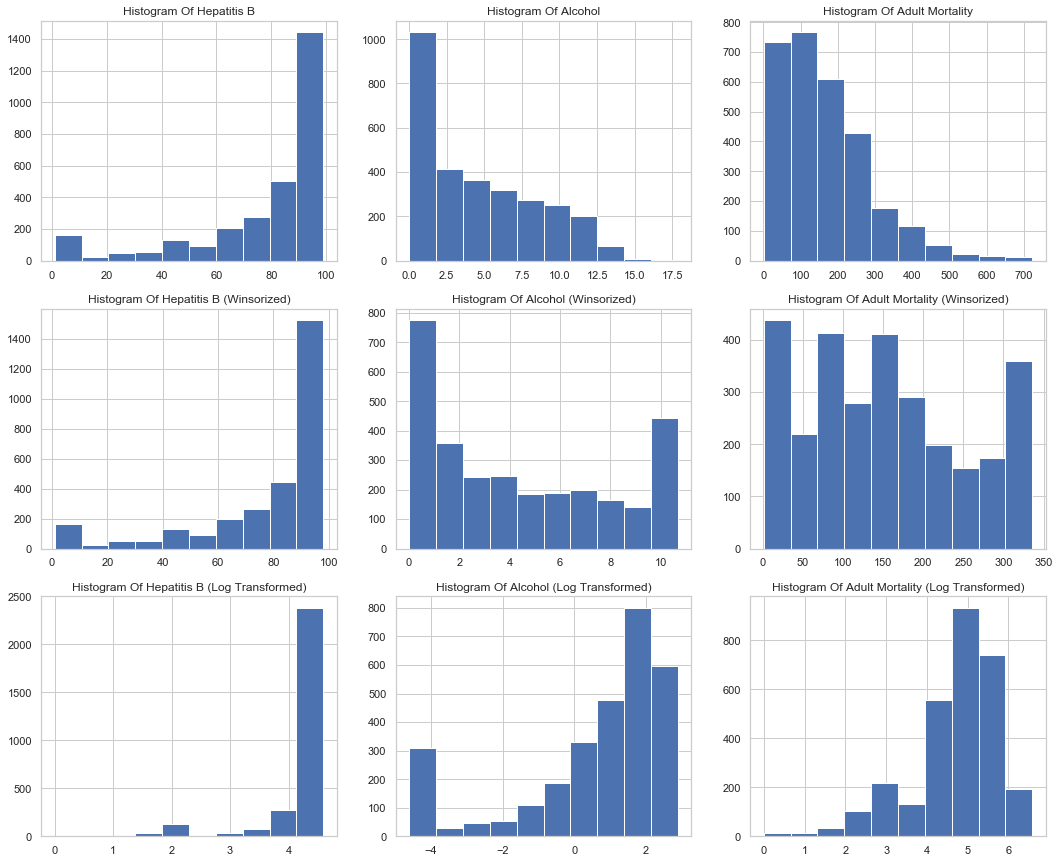

In [189]:
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(life_expectancy_df["Hepatitis B"])
plt.title("Histogram Of Hepatitis B")

plt.subplot(3, 3, 2)
plt.hist(life_expectancy_df["Alcohol"])
plt.title("Histogram Of Alcohol")

plt.subplot(3, 3, 3)
plt.hist(life_expectancy_df["Adult Mortality"])
plt.title("Histogram Of Adult Mortality")

plt.subplot(3, 3, 4)
plt.hist(life_expectancy_df["winsorized_hepatitis_b"])
plt.title("Histogram Of Hepatitis B (Winsorized)")

plt.subplot(3, 3, 5)
plt.hist(life_expectancy_df["winsorized_alcohol"])
plt.title("Histogram Of Alcohol (Winsorized)")

plt.subplot(3, 3, 6)
plt.hist(life_expectancy_df["winsorized_views"])
plt.title("Histogram Of Adult Mortality (Winsorized)")

plt.subplot(3, 3, 7)
plt.hist(np.log(life_expectancy_df["Hepatitis B"]))
plt.title("Histogram Of Hepatitis B (Log Transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(life_expectancy_df["Alcohol"]))
plt.title("Histogram Of Alcohol (Log Transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(life_expectancy_df["Adult Mortality"]))
plt.title("Histogram Of Adult Mortality (Log Transformed)")


plt.show()

In [190]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.log(life_expectancy_df["Hepatitis B"]))
norm_stats = normaltest(np.log(life_expectancy_df["Hepatitis B"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(life_expectancy_df["Alcohol"]))
norm_stats = normaltest(np.log(life_expectancy_df["Alcohol"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(life_expectancy_df["Adult Mortality"]))
norm_stats = normaltest(np.log(life_expectancy_df["Adult Mortality"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 11516.54134466533 and p value is 0.0
Normality test statistics is 1714.272313601255 and p value is 0.0
Jarque-Bera test statistics is 1012.4074939079095 and p value is 0.0
Normality test statistics is 595.4751484923795 and p value is 4.945548321917427e-130
Jarque-Bera test statistics is 1175.4003625310663 and p value is 0.0
Normality test statistics is 612.4811335864683 and p value is 1.0032558638217946e-133


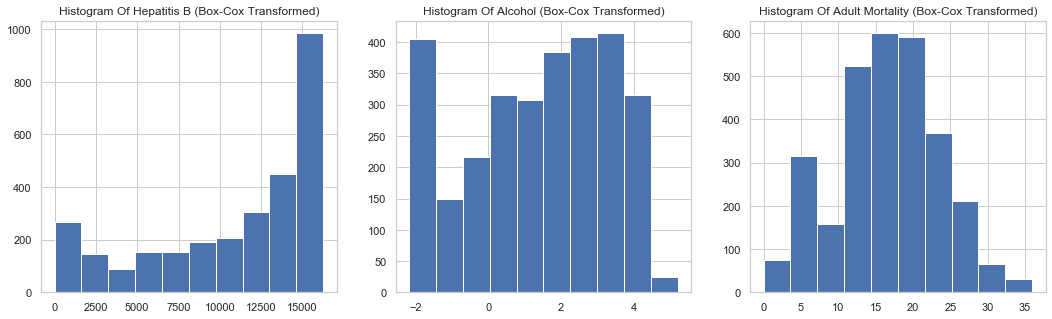

In [191]:
from scipy.stats import boxcox

alcohol_boxcox,_ = boxcox(life_expectancy_df["Alcohol"])
hepatitis_b_boxcox,_ = boxcox(life_expectancy_df["Hepatitis B"])
video_views_boxcox,_ = boxcox(life_expectancy_df["Adult Mortality"])

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(hepatitis_b_boxcox)
plt.title("Histogram Of Hepatitis B (Box-Cox Transformed)")

plt.subplot(1, 3, 2)
plt.hist(alcohol_boxcox)
plt.title("Histogram Of Alcohol (Box-Cox Transformed)")

plt.subplot(1, 3, 3)
plt.hist(video_views_boxcox)
plt.title("Histogram Of Adult Mortality (Box-Cox Transformed)")

plt.show()

In [192]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(hepatitis_b_boxcox)
norm_stats = normaltest(hepatitis_b_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(alcohol_boxcox)
norm_stats = normaltest(alcohol_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(video_views_boxcox)
norm_stats = normaltest(video_views_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 401.7874896322517 and p value is 0.0
Normality test statistics is 356.4632590766887 and p value is 3.935381057570702e-78
Jarque-Bera test statistics is 187.43407655099293 and p value is 0.0
Normality test statistics is 697.5372390845896 and p value is 3.4018336422751775e-152
Jarque-Bera test statistics is 16.13204863425656 and p value is 0.0003140292834127312
Normality test statistics is 21.13225980915823 and p value is 2.5774371702909884e-05


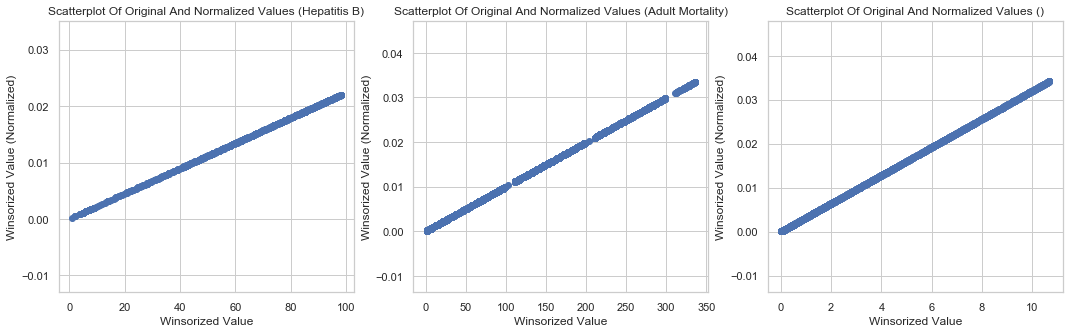

In [193]:
from sklearn.preprocessing import normalize

life_expectancy_df["norm_winsorized_hepatitis_b"] = normalize(np.array(life_expectancy_df["winsorized_hepatitis_b"]).reshape(1,-1)).reshape(-1,1)
life_expectancy_df["norm_winsorized_views"] = normalize(np.array(life_expectancy_df["winsorized_views"]).reshape(1,-1)).reshape(-1,1)
life_expectancy_df["norm_winsorized_alcohol"] = normalize(np.array(life_expectancy_df["winsorized_alcohol"]).reshape(1,-1)).reshape(-1,1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

plt.scatter(life_expectancy_df["winsorized_hepatitis_b"], life_expectancy_df["norm_winsorized_hepatitis_b"])
plt.title("Scatterplot Of Original And Normalized Values (Hepatitis B)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,2)

plt.scatter(life_expectancy_df["winsorized_views"], life_expectancy_df["norm_winsorized_views"])
plt.title("Scatterplot Of Original And Normalized Values (Adult Mortality)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,3)

plt.scatter(life_expectancy_df["winsorized_alcohol"], life_expectancy_df["norm_winsorized_alcohol"])
plt.title("Scatterplot Of Original And Normalized Values (Alcohol)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.show()

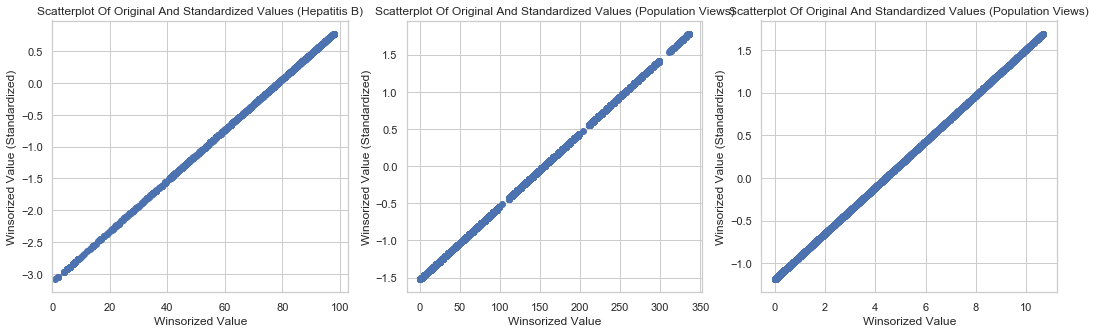

In [194]:
from sklearn.preprocessing import scale

life_expectancy_df["scaled_winsorized_hepatitis_b"] = scale(life_expectancy_df["winsorized_hepatitis_b"])
life_expectancy_df["scaled_winsorized_views"] = scale(life_expectancy_df["winsorized_views"])
life_expectancy_df["scaled_winsorized_alcohol"] = scale(life_expectancy_df["winsorized_alcohol"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

plt.scatter(life_expectancy_df["winsorized_hepatitis_b"], life_expectancy_df["scaled_winsorized_hepatitis_b"])
plt.title("Scatterplot Of Original And Standardized Values (Hepatitis B)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")
plt.xlim(0.00000001)

plt.subplot(1,3,2)

plt.scatter(life_expectancy_df["winsorized_views"], life_expectancy_df["scaled_winsorized_views"])
plt.title("Scatterplot Of Original And Standardized Values (Population Views)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")

plt.subplot(1,3,3)

plt.scatter(life_expectancy_df["winsorized_alcohol"], life_expectancy_df["scaled_winsorized_alcohol"])
plt.title("Scatterplot Of Original And Standardized Values (Population Views)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")

plt.show()

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

life_expectancy_df = pd.read_sql_query('select * from lifeexpectancy',con = engine)

engine.dispose()

life_expectancy_df = life_expectancy_df.iloc[:,53:87]
life_expectancy_df.corr()

""


In [196]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize

life_expectancy_df = pd.read_sql_query('select * from lifeexpectancy',con = engine)

life_expectancy_df = life_expectancy_df.dropna()

values = life_expectancy_df[["Alcohol", "Hepatitis B", "infant deaths", "Adult Mortality"]]

X = StandardScaler().fit_transform(values)



sklearn_pca = PCA(n_components=1)
life_expectancy_df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.34739003]


# 4) Summary Of Findings

In [ ]:
# Three factors are examined here: Hepatitis B, alcohol, and adult mortality. The histogram for Hepatitis B indicates that the 
# highest number of Hepatitis B cases has the highest amount of deaths. The histogram for alcohol indicates 
# that the lowest and medium levels of alcohol have the highest amount of deaths. The histogram for adult mortality indicates 
# that the lowest number of adult mortality cases has the highest amount of deaths. These three histograms show that Hepatitis 
# B is the primary cause of death, that alcohol is the secondary cause of death, and that adult mortality is the tertiary cause 
# of death. 

# Moreoever, the three scatterplots for alcohol and Hepatitis B indicate that the lowest and medium levels of alcohol are matched 
# with the highest number of Hepatitis B cases. The three scatterplots for adult mortality and alcohol indicate that the lowest 
# and medium levels of alcohol are matched with the low number of deaths of younger adults. The three scatterplots for adult 
# mortality and Hepatitis B indicate that the lowest number of deaths of younger adults is matched with the highest number of 
# Hepatitis B. In addition, the horizontal bar graph indicates that the life expectancy is almost five times higher for developing 
# countries than for developed countries. The three histograms, the horizontal bar graph, and the nine scatterplots indicate 
# that Hepatitis B is the primary cause of death and that older adults are the demographic that is affected the most by 
# Hepatitis B in developed countries. 